In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
import os
%matplotlib inline

# import the dataset

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/cancer-dataset-aggregated/cancer_reg.csv


In [3]:
df = pd.read_csv('../input/cancer-dataset-aggregated/cancer_reg.csv',encoding='latin-1')

# shape of the dataset

In [4]:
df.shape

(3047, 34)

In [5]:
df.head()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,1397.0,469,164.9,489.8,61898,260131,11.2,499.748204,"(61494.5, 125635]",39.3,...,NaN,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.0,70,161.3,411.6,48127,43269,18.6,23.111234,"(48021.6, 51046.4]",33.0,...,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,102.0,50,174.7,349.7,49348,21026,14.6,47.560164,"(48021.6, 51046.4]",45.0,...,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,427.0,202,194.8,430.4,44243,75882,17.1,342.637253,"(42724.4, 45201]",42.8,...,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,57.0,26,144.4,350.1,49955,10321,12.5,0.000000,"(48021.6, 51046.4]",48.3,...,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657


# dtype of the dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 34 columns):
avgAnnCount                3047 non-null float64
avgDeathsPerYear           3047 non-null int64
TARGET_deathRate           3047 non-null float64
incidenceRate              3047 non-null float64
medIncome                  3047 non-null int64
popEst2015                 3047 non-null int64
povertyPercent             3047 non-null float64
studyPerCap                3047 non-null float64
binnedInc                  3047 non-null object
MedianAge                  3047 non-null float64
MedianAgeMale              3047 non-null float64
MedianAgeFemale            3047 non-null float64
Geography                  3047 non-null object
AvgHouseholdSize           3047 non-null float64
PercentMarried             3047 non-null float64
PctNoHS18_24               3047 non-null float64
PctHS18_24                 3047 non-null float64
PctSomeCol18_24            762 non-null float64
PctBachDeg18_24     

# Mean of feature binnedinc as it is Median income per capita binned by decile (b)

In [7]:
df['binnedInc']=df['binnedInc'].str.replace('(','')
df['binnedInc']=df['binnedInc'].str.replace('[','')
df['binnedInc']=df['binnedInc'].str.replace(']','')

In [8]:
x=df['binnedInc'].str.split(',',expand=True).astype(float)

In [9]:
x=df['binnedInc'].str.split(',',expand=True).astype(float)
y=(x[0]+x[1])/2
df['binnedInc']=y
df.head()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,1397.0,469,164.9,489.8,61898,260131,11.2,499.748204,93564.75,39.3,...,NaN,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.0,70,161.3,411.6,48127,43269,18.6,23.111234,49534.00,33.0,...,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,102.0,50,174.7,349.7,49348,21026,14.6,47.560164,49534.00,45.0,...,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,427.0,202,194.8,430.4,44243,75882,17.1,342.637253,43962.70,42.8,...,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,57.0,26,144.4,350.1,49955,10321,12.5,0.000000,49534.00,48.3,...,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657


# summary stats for the features

In [10]:
df.describe()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
count,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3.047000e+03,3047.000000,3047.000000,3047.000000,3047.000000,...,2438.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000
mean,606.338544,185.965868,178.664063,448.268586,47063.281917,1.026374e+05,16.878175,155.399415,48878.118280,45.272333,...,48.453774,41.196324,36.252642,19.240072,83.645286,9.107978,1.253965,1.983523,51.243872,5.640306
std,1416.356223,504.134286,27.751511,54.560733,12040.090836,3.290592e+05,6.409087,529.628366,16889.719362,45.304480,...,10.083006,9.447687,7.841741,6.113041,16.380025,14.534538,2.610276,3.517710,6.572814,1.985816
min,6.000000,3.000000,59.700000,201.300000,22640.000000,8.270000e+02,3.200000,0.000000,28429.050000,22.300000,...,15.700000,13.500000,11.200000,2.600000,10.199155,0.000000,0.000000,0.000000,22.992490,0.000000
25%,76.000000,28.000000,161.200000,420.300000,38882.500000,1.168400e+04,12.150000,0.000000,38888.250000,37.700000,...,41.000000,34.500000,30.900000,14.850000,77.296180,0.620675,0.254199,0.295172,47.763063,4.521419
50%,171.000000,61.000000,178.100000,453.549422,45207.000000,2.664300e+04,15.900000,0.000000,46611.300000,41.000000,...,48.700000,41.100000,36.300000,18.800000,90.059774,2.247576,0.549812,0.826185,51.669941,5.381478
75%,518.000000,149.000000,195.200000,480.850000,52492.000000,6.867100e+04,20.400000,83.650776,52796.000000,44.000000,...,55.600000,47.700000,41.550000,23.100000,95.451693,10.509732,1.221037,2.177960,55.395132,6.493677
max,38150.000000,14010.000000,362.800000,1206.900000,125635.000000,1.017029e+07,47.400000,9762.308998,93564.750000,624.000000,...,78.900000,70.700000,65.100000,46.600000,100.000000,85.947799,42.619425,41.930251,78.075397,21.326165


# checking the outliers

/opt/conda/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/opt/conda/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/opt/conda/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memo

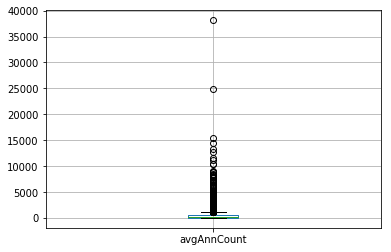

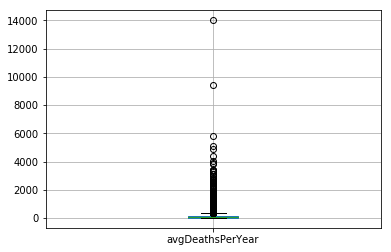

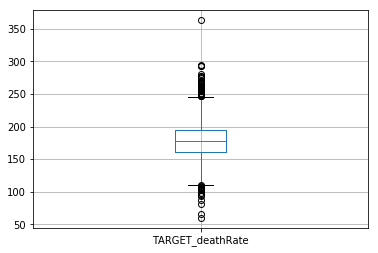

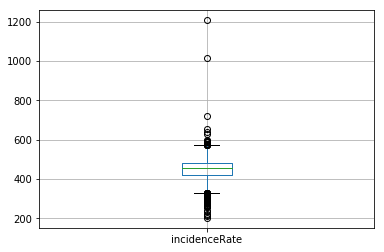

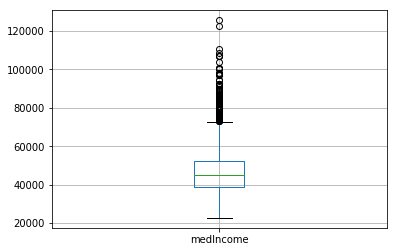

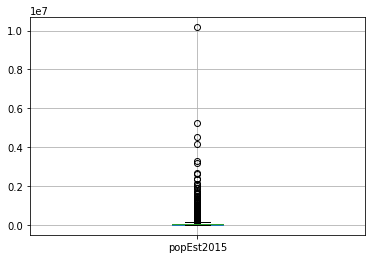

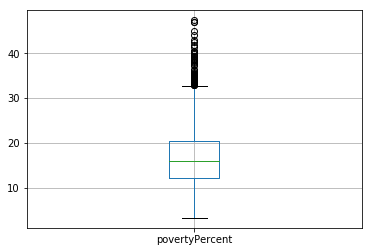

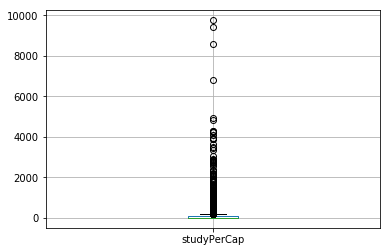

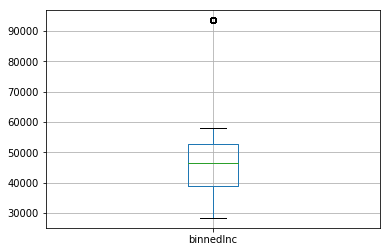

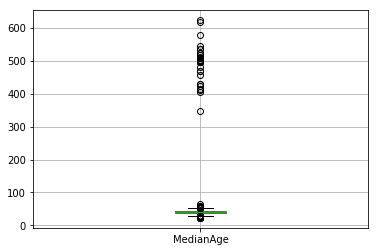

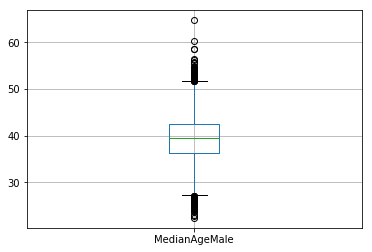

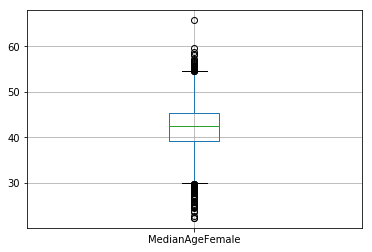

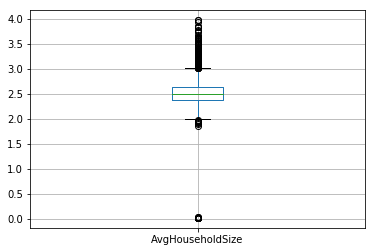

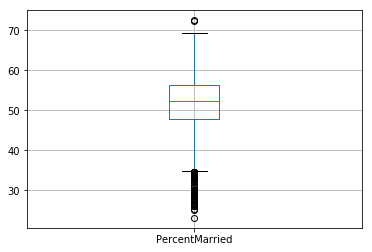

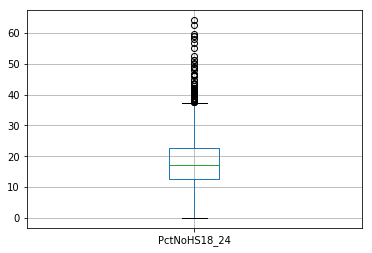

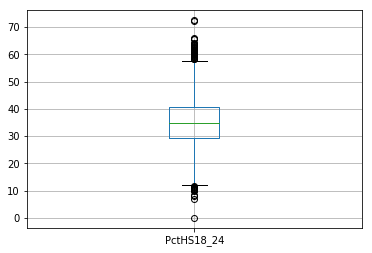

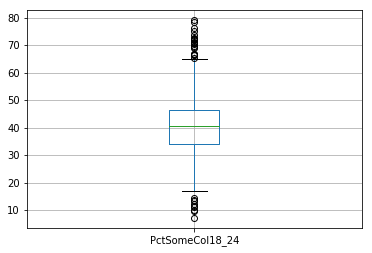

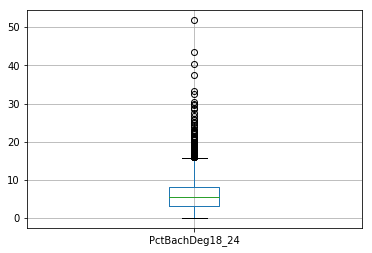

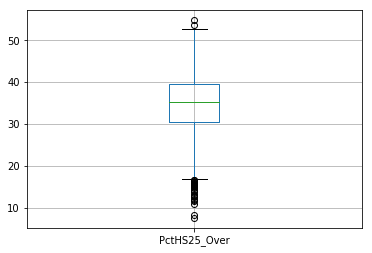

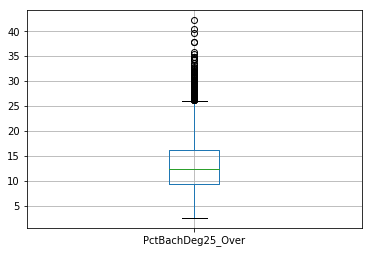

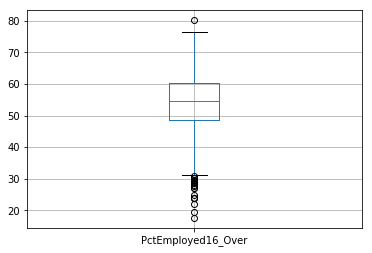

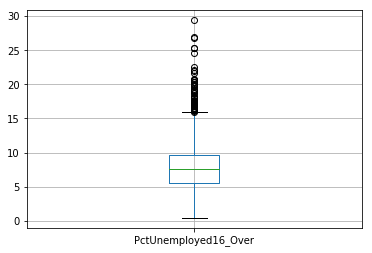

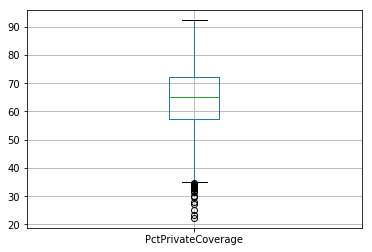

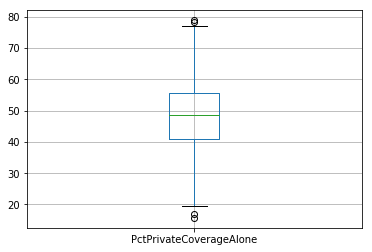

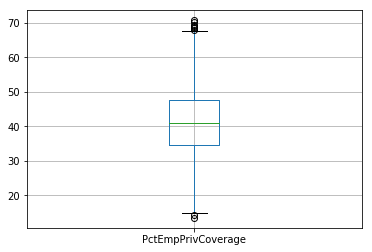

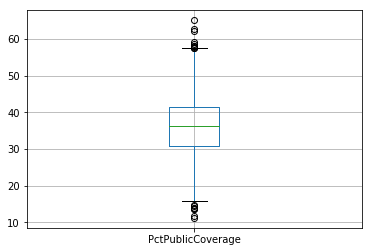

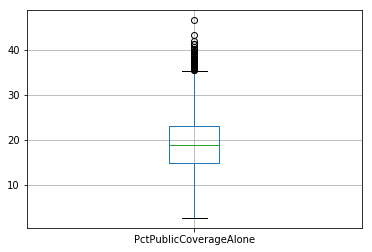

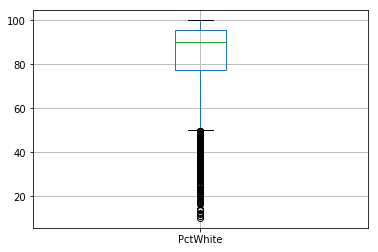

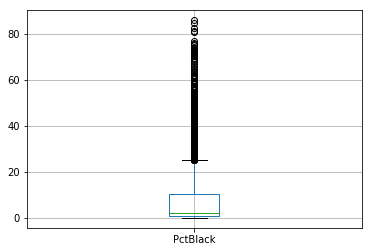

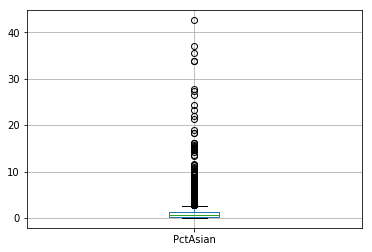

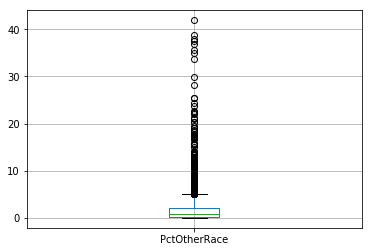

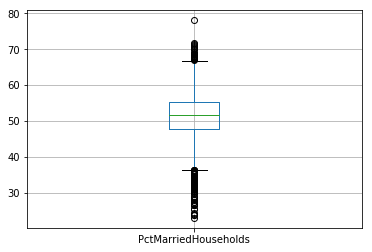

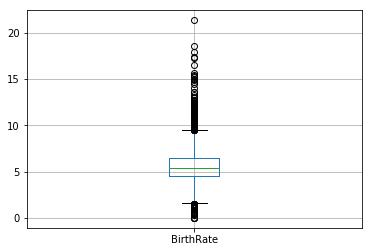

In [11]:
for i in df:
    if (i=='Geography'):
        continue
    else:
        plt.figure()
        df.boxplot(column=[i])

Observation:

All the variables including dependent variable 'target_deathrate' has outliers 

In [12]:
print('count of outliers below lower whisker is :',(df['TARGET_deathRate']<df['TARGET_deathRate'].quantile(0.25)-(1.5*(st.iqr(df['TARGET_deathRate'])))).sum())

count of outliers below lower whisker is : 21


In [13]:
print('count of outliers above upper whisker is :',(df['TARGET_deathRate']>df['TARGET_deathRate'].quantile(0.75)+(1.5*(st.iqr(df['TARGET_deathRate'])))).sum())

count of outliers above upper whisker is : 43


# droping outliers from dependent variable

In [14]:
# since target variable has outliers less then 10% of the data, drop the outliers
df1=df[(df['TARGET_deathRate']>df['TARGET_deathRate'].quantile(0.25)-(1.5*(st.iqr(df['TARGET_deathRate']))))&(df['TARGET_deathRate']<df['TARGET_deathRate'].quantile(0.75)+(1.5*(st.iqr(df['TARGET_deathRate']))))]

In [15]:
df1.shape

(2983, 34)

# null values

In [16]:
df1.isna().sum()

avgAnnCount                   0
avgDeathsPerYear              0
TARGET_deathRate              0
incidenceRate                 0
medIncome                     0
popEst2015                    0
povertyPercent                0
studyPerCap                   0
binnedInc                     0
MedianAge                     0
MedianAgeMale                 0
MedianAgeFemale               0
Geography                     0
AvgHouseholdSize              0
PercentMarried                0
PctNoHS18_24                  0
PctHS18_24                    0
PctSomeCol18_24            2241
PctBachDeg18_24               0
PctHS25_Over                  0
PctBachDeg25_Over             0
PctEmployed16_Over          147
PctUnemployed16_Over          0
PctPrivateCoverage            0
PctPrivateCoverageAlone     596
PctEmpPrivCoverage            0
PctPublicCoverage             0
PctPublicCoverageAlone        0
PctWhite                      0
PctBlack                      0
PctAsian                      0
PctOther

In [17]:
#since 'PctEmployed16_Over' have missing value less then 10% it is imputed with median
df1['PctEmployed16_Over']=df1['PctEmployed16_Over'].fillna(df1['PctEmployed16_Over'].median())


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


# distribution of the features

/opt/conda/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


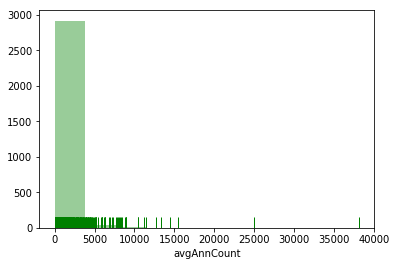

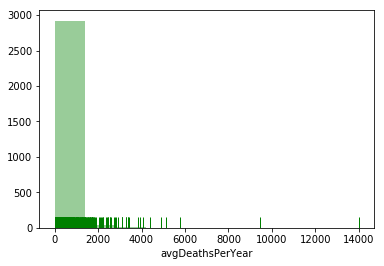

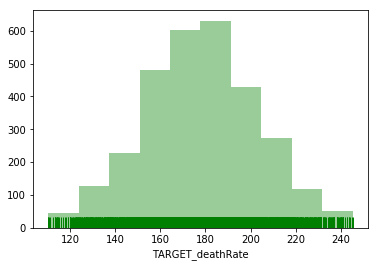

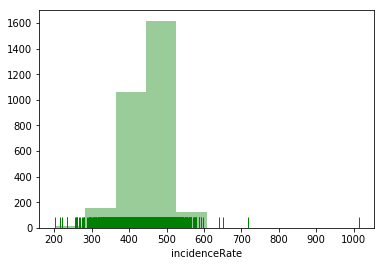

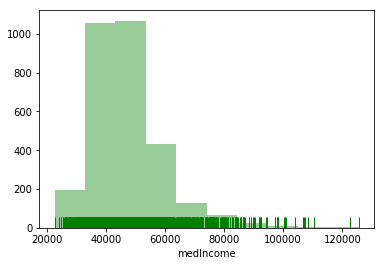

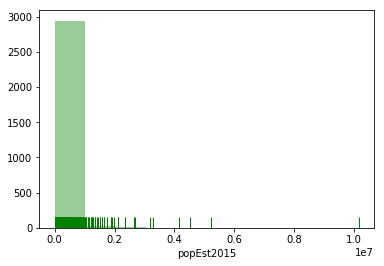

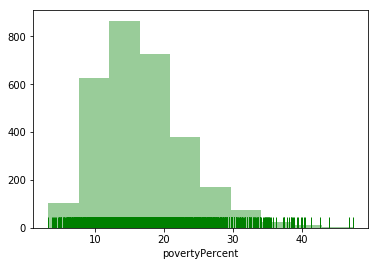

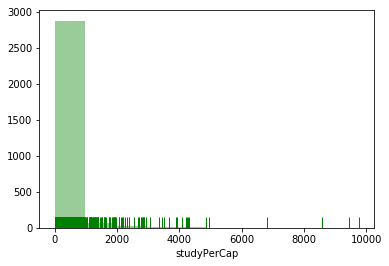

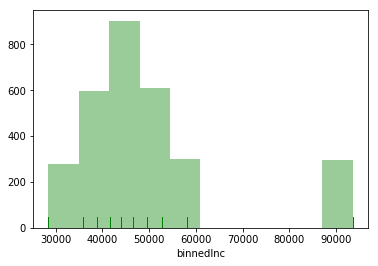

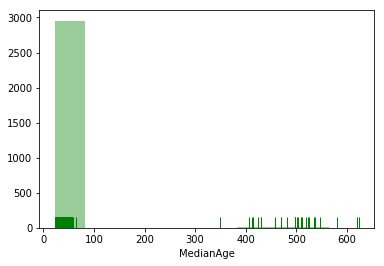

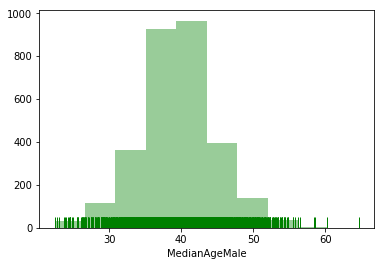

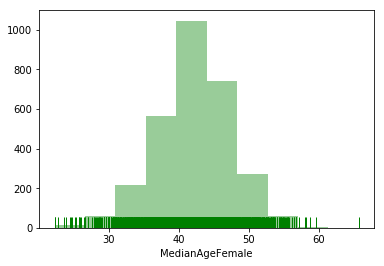

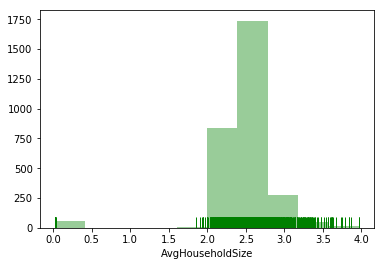

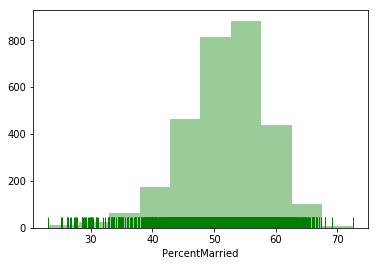

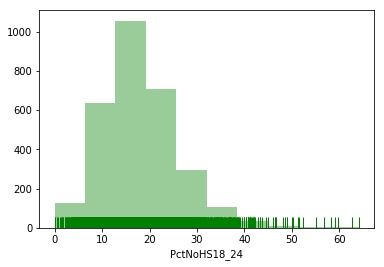

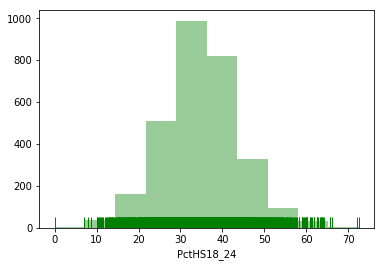

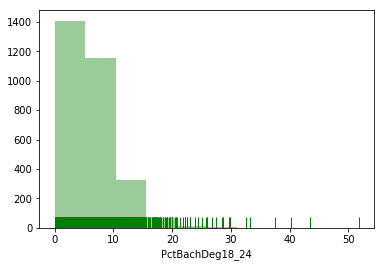

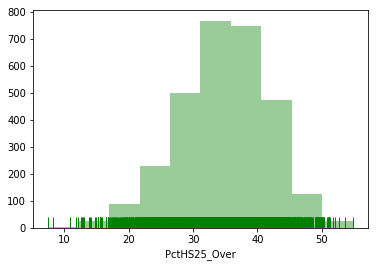

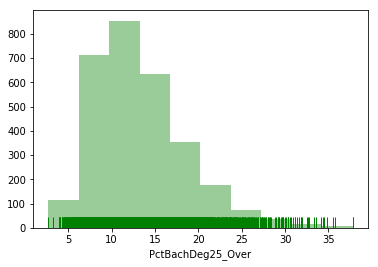

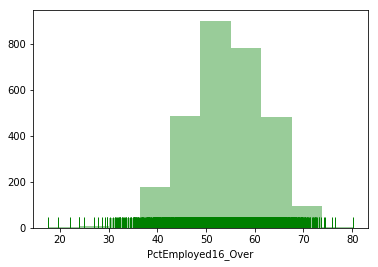

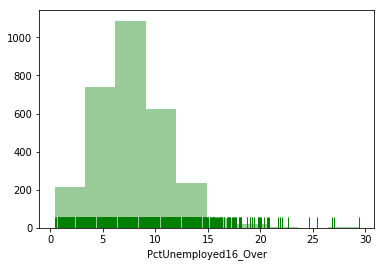

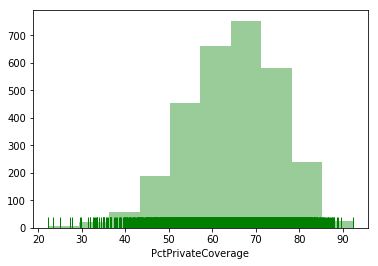

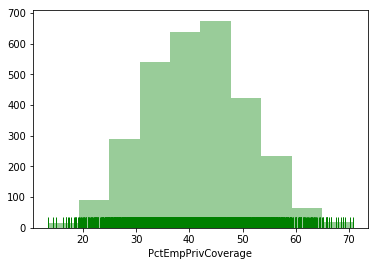

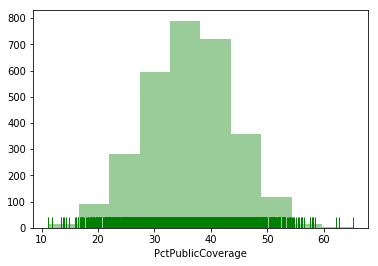

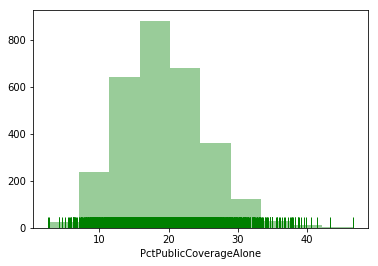

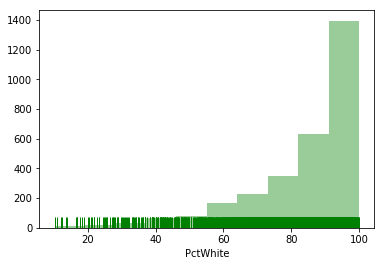

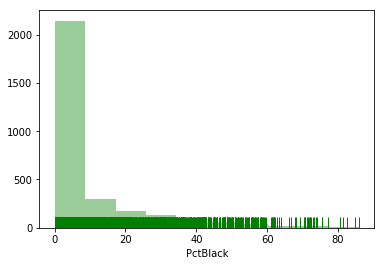

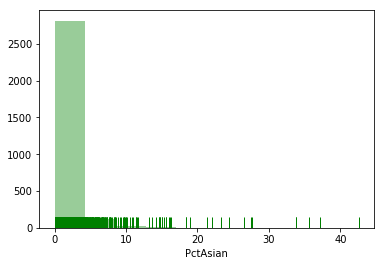

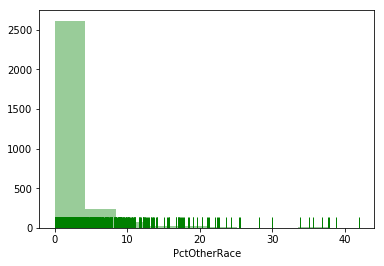

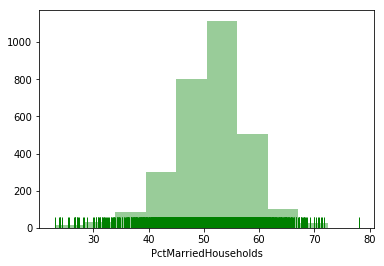

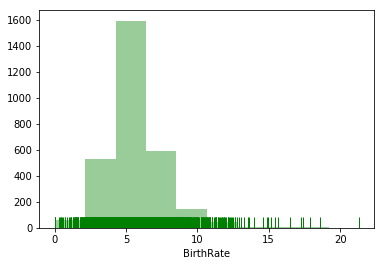

In [18]:
for i in df1.columns:
    if (i=='Geography' or i=='PctSomeCol18_24' or i=='PctPrivateCoverageAlone'):
        continue
    else:
        plt.figure()
        sns.distplot(df1[i],kde=False,color='g',bins=10,rug=True)

observation:

the distribution of features looks highly hightly right/left skwed

# corr between the features

In [19]:
# corr matrix
df1.corr()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
avgAnnCount,1.000000,0.940412,-0.156095,0.079883,0.270707,0.927859,-0.133425,0.083899,0.249491,-0.023936,...,0.185339,0.199569,-0.174420,-0.090250,-0.141508,0.033868,0.435093,0.209319,-0.110960,-0.036610
avgDeathsPerYear,0.940412,1.000000,-0.096126,0.067589,0.223946,0.977639,-0.063680,0.064325,0.213549,-0.024450,...,0.123932,0.157188,-0.132043,-0.023183,-0.192670,0.086791,0.442975,0.216236,-0.167232,-0.075508
TARGET_deathRate,-0.156095,-0.096126,1.000000,0.395670,-0.423912,-0.127569,0.392307,-0.035002,-0.386471,-0.003203,...,-0.349074,-0.261755,0.376440,0.412648,-0.167965,0.260651,-0.198318,-0.193480,-0.288228,-0.078517
incidenceRate,0.079883,0.067589,0.395670,1.000000,0.029652,0.030455,-0.037924,0.077570,0.026487,0.014131,...,0.139957,0.172485,0.009677,-0.006076,-0.007992,0.113366,-0.003181,-0.212201,-0.154739,-0.111214
medIncome,0.270707,0.223946,-0.423912,0.029652,1.000000,0.236292,-0.788700,0.049143,0.926969,-0.011874,...,0.785644,0.746958,-0.748532,-0.714885,0.170745,-0.270312,0.426973,0.074994,0.449365,-0.019047
popEst2015,0.927859,0.977639,-0.127569,0.030455,0.236292,1.000000,-0.061984,0.056563,0.223002,-0.025112,...,0.131082,0.156008,-0.160782,-0.037660,-0.195703,0.075299,0.464100,0.242456,-0.134074,-0.058751
povertyPercent,-0.133425,-0.063680,0.392307,-0.037924,-0.788700,-0.061984,1.000000,-0.061581,-0.718858,-0.029407,...,-0.757340,-0.681045,0.635047,0.786756,-0.524057,0.520434,-0.154383,0.063906,-0.611475,-0.002644
studyPerCap,0.083899,0.064325,-0.035002,0.077570,0.049143,0.056563,-0.061581,1.000000,0.034956,-0.025596,...,0.077475,0.102228,-0.056661,-0.061719,0.028063,-0.027221,0.064545,-0.013540,-0.054000,0.009830
binnedInc,0.249491,0.213549,-0.386471,0.026487,0.926969,0.223002,-0.718858,0.034956,1.000000,0.001268,...,0.726710,0.692503,-0.704671,-0.657112,0.132723,-0.230132,0.388835,0.069877,0.409174,-0.019920
MedianAge,-0.023936,-0.024450,-0.003203,0.014131,-0.011874,-0.025112,-0.029407,-0.025596,0.001268,1.000000,...,-0.023270,-0.037102,0.049330,-0.004405,0.031606,-0.015138,-0.037810,-0.029359,0.012139,-0.007205


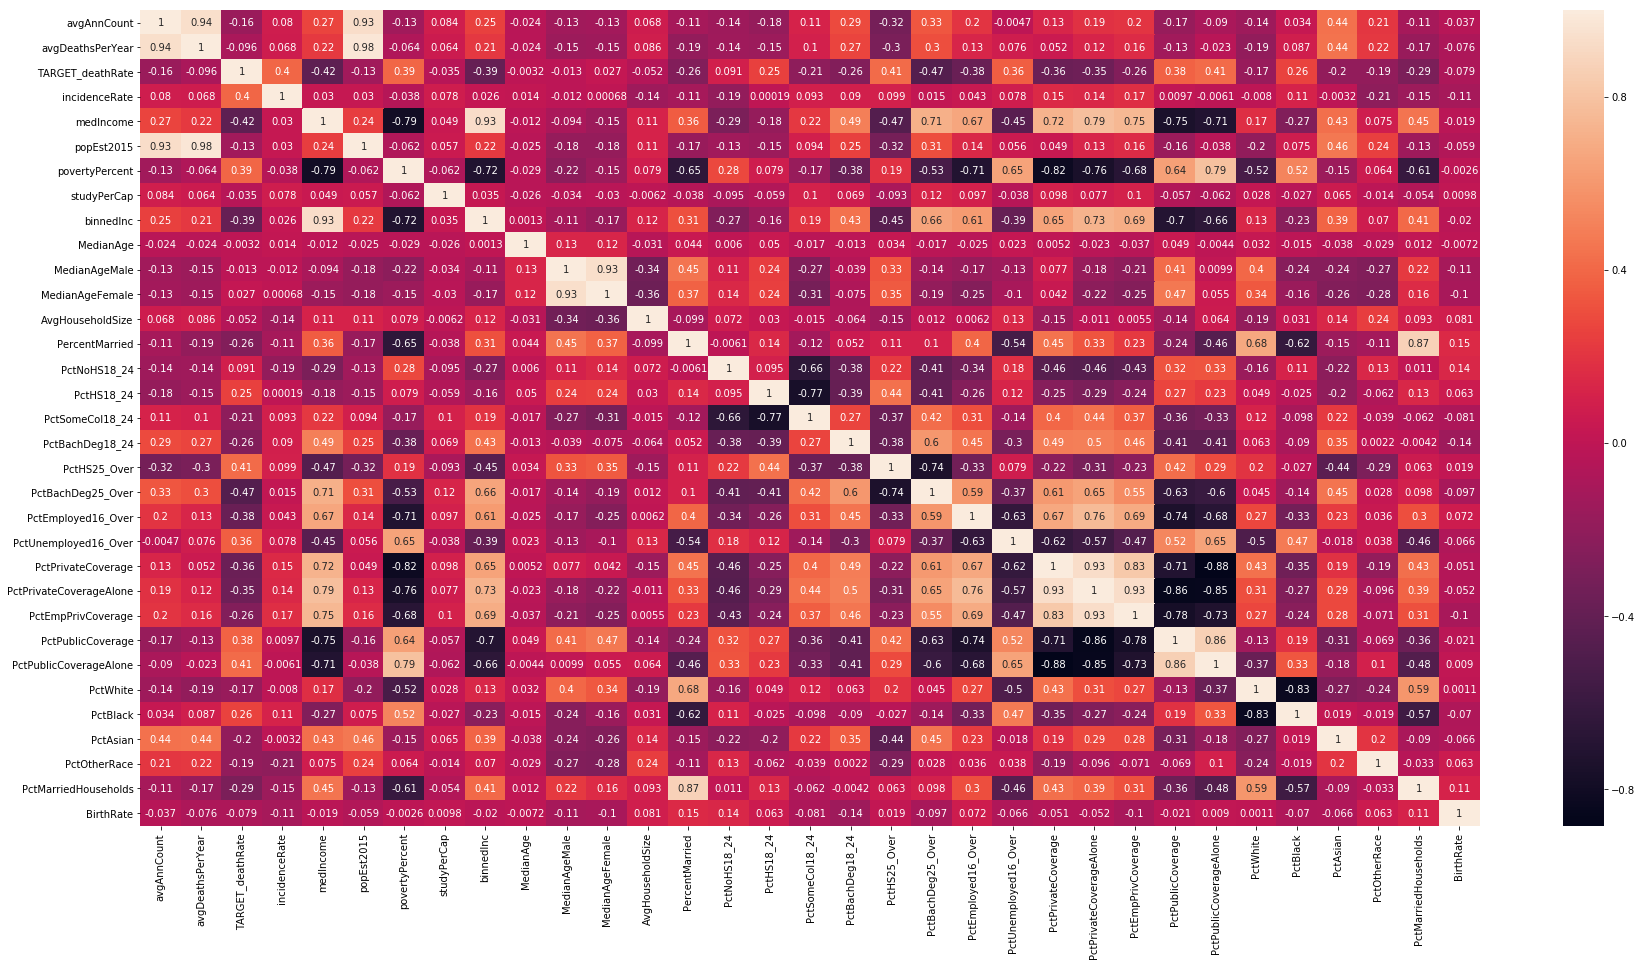

In [20]:
plt.figure(figsize=(30,15))
sns.heatmap(df1.corr(),annot=True)

observation:

from the heatmap it becomes clear that there lies a multicollinarity  between the variables

# perform ols test to check the significant features 

In [21]:
import warnings 
warnings.filterwarnings('ignore')
import statsmodels.api as sm
#drop the 'geography' ,'pctsomecol18_24' ,'pctprivatecoveragealone' as they have the most missing values.
# drop the dependent variable 
x=df1.drop(['Geography' ,'PctSomeCol18_24','PctPrivateCoverageAlone','TARGET_deathRate'],axis=1)
x_constant = sm.add_constant(x)
y=df1['TARGET_deathRate']
y1=list(y)

In [22]:
model = sm.OLS(y1,x_constant).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.485
Model:                            OLS   Adj. R-squared:                  0.479
Method:                 Least Squares   F-statistic:                     92.54
Date:                Fri, 27 Dec 2019   Prob (F-statistic):               0.00
Time:                        09:18:58   Log-Likelihood:                -12850.
No. Observations:                2983   AIC:                         2.576e+04
Df Residuals:                    2952   BIC:                         2.595e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    184.9320     15.004     12.326      0.000     155.513     214.351
avgAnnCount               -0.0039      0.001     -5.362      0.000      -0.005      -0.002
avgDeathsPerYear           0.0199      0.004      5.434      0.000       0.013       0.027
incidenceRate              0.1682      0.007     23.286      0.000       0.154       0.182
medIncome              -3.098e-05      0.000     -0.301      0.763      -0.000       0.000
popEst2015             -1.585e-05   5.12e-06     -3.095      0.002   -2.59e-05   -5.81e-06
povertyPercent            -0.0567      0.158     -0.359      0.720      -0.367       0.253
studyPerCap               -0.0002      0.001     -0.285      0.775      -0.001       0.001
binnedInc              -1.737e-05   5.33e-05     -0.326      0.745      -0.000    8.72e-05
MedianAge                 -0.0056      0.007     -0.749      0.454      -0.020       0.009
MedianAgeMale             -0.5836      0.199     -2.926      0.003      -0.975      -0.193
MedianAgeFemale           -0.0227      0.207     -0.110      0.913      -0.428       0.383
AvgHouseholdSize           0.5054      0.911      0.554      0.579      -1.282       2.293
PercentMarried             1.0496      0.161      6.507      0.000       0.733       1.366
PctNoHS18_24              -0.0897      0.054     -1.677      0.094      -0.195       0.015
PctHS18_24                 0.1891      0.047      4.012      0.000       0.097       0.282
PctBachDeg18_24            0.0173      0.104      0.166      0.868      -0.187       0.221
PctHS25_Over               0.4594      0.093      4.965      0.000       0.278       0.641
PctBachDeg25_Over         -1.0455      0.150     -6.977      0.000      -1.339      -0.752
PctEmployed16_Over        -0.4712      0.096     -4.910      0.000      -0.659      -0.283
PctUnemployed16_Over       0.2915      0.160      1.824      0.068      -0.022       0.605
PctPrivateCoverage        -0.4599      0.126     -3.661      0.000      -0.706      -0.214
PctEmpPrivCoverage         0.2847      0.099      2.878      0.004       0.091       0.479
PctPublicCoverage         -0.2932      0.218     -1.348      0.178      -0.720       0.133
PctPublicCoverageAlone     0.2506      0.271      0.925      0.355      -0.281       0.782
PctWhite                  -0.0911      0.056     -1.629      0.103      -0.201       0.019
PctBlack                   0.0035      0.054      0.065      0.948      -0.102       0.110
PctAsian                   0.0342      0.178      0.192      0.848      -0.315       0.384
PctOtherRace              -0.8401      0.118     -7.134      0.000      -1.071      -0.609
PctMarriedHouseholds      -1.1046      0.153     -7.213      0.000      -1.405      -0.804
BirthRate                 -0.7573      0.185     -4.093      0.000      -1.120  

OBSERVATION:

:Durbin-Watson score is 1.789 which indicates there lies no autocorrelation between the dependent features




# multicolliniarity with VIF

In [23]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(x_constant.values, i) for i in range(x_constant.shape[1])]
pd.DataFrame({'vif': vif[1:]}, index=x.columns)

,vif
avgAnnCount,10.000459
avgDeathsPerYear,31.835049
incidenceRate,1.269424
medIncome,13.837645
popEst2015,26.477744
povertyPercent,8.815854
studyPerCap,1.051152
binnedInc,7.324404
MedianAge,1.026671
MedianAgeMale,9.888868


In [24]:
# features which has highly multicollinarity
vif_=pd.DataFrame({'vif': vif[1:]}, index=x.columns)
vif_[vif_['vif']>10]

,vif
avgAnnCount,10.000459
avgDeathsPerYear,31.835049
medIncome,13.837645
popEst2015,26.477744
MedianAgeFemale,10.871388
PercentMarried,11.071620
PctPrivateCoverage,15.849006
PctPublicCoverage,25.660932
PctPublicCoverageAlone,23.669010


# features which as passed the statistical test

In [25]:
features=[]
a=model.pvalues
for i in range(a.shape[0]):
    if  a[i]<0.05:
        features.append(a.index[i])
    else:
        continue
print(features)

['const', 'avgAnnCount', 'avgDeathsPerYear', 'incidenceRate', 'popEst2015', 'MedianAgeMale', 'PercentMarried', 'PctHS18_24', 'PctHS25_Over', 'PctBachDeg25_Over', 'PctEmployed16_Over', 'PctPrivateCoverage', 'PctEmpPrivCoverage', 'PctOtherRace', 'PctMarriedHouseholds', 'BirthRate']


In [26]:
X=df1[[ 'avgAnnCount', 'avgDeathsPerYear', 'incidenceRate', 'popEst2015', 'MedianAgeMale', 'PercentMarried', 'PctHS18_24', 'PctHS25_Over', 'PctBachDeg25_Over', 'PctEmployed16_Over', 'PctPrivateCoverage', 'PctEmpPrivCoverage', 'PctOtherRace', 'PctMarriedHouseholds', 'BirthRate']]

# Scatter plot to check the linear relation with dependent feature

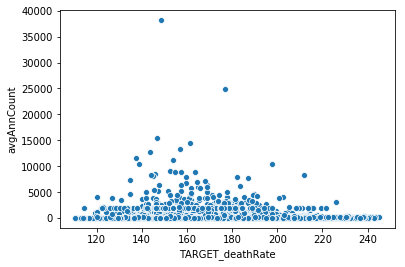

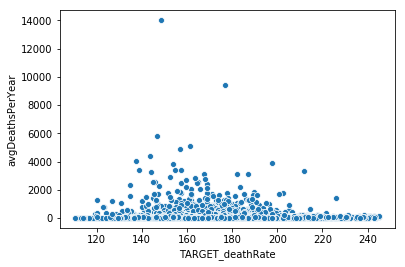

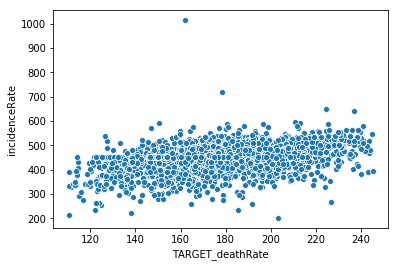

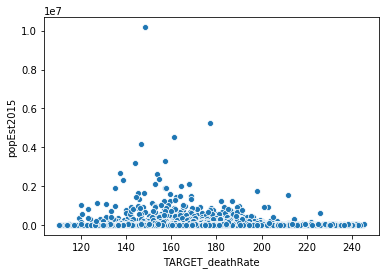

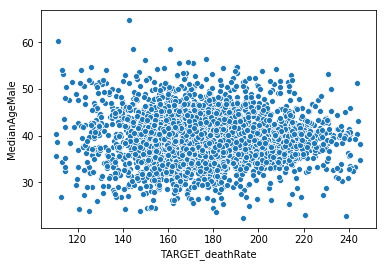

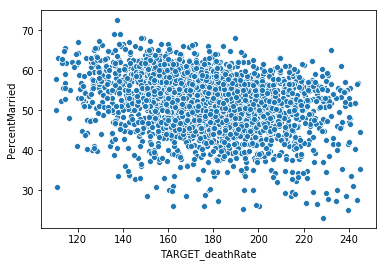

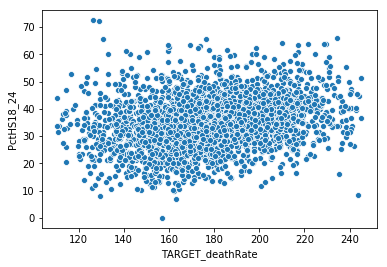

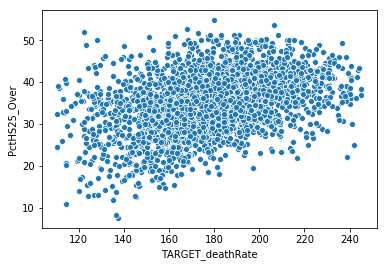

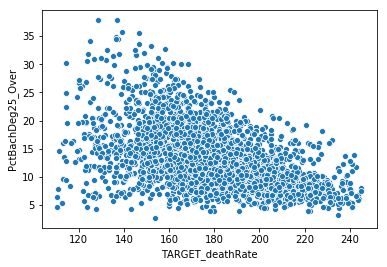

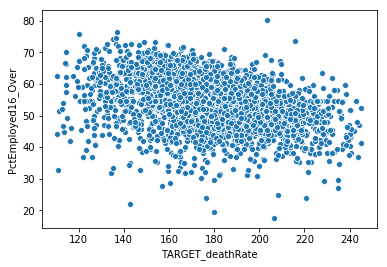

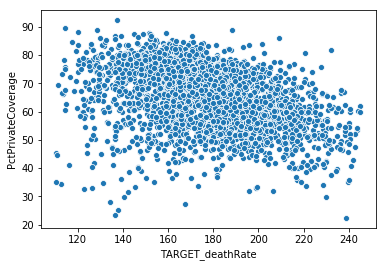

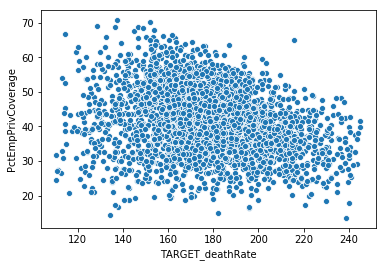

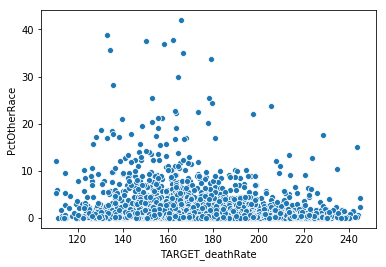

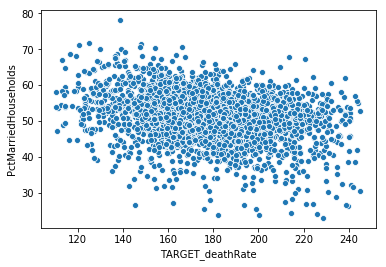

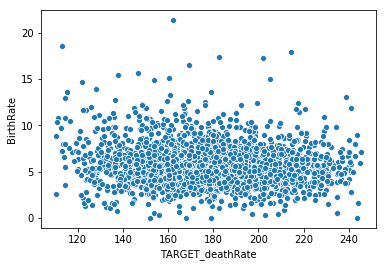

In [27]:
for i in X.columns:
    plt.figure()
    sns.scatterplot(x=df1['TARGET_deathRate'],y=i,data=df1)

# distribution before transformation 

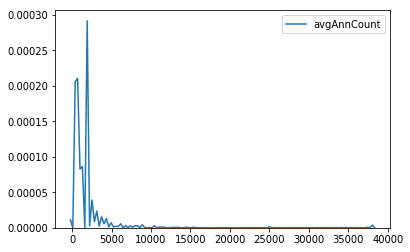

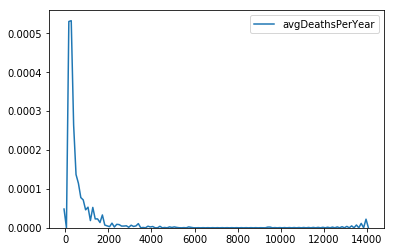

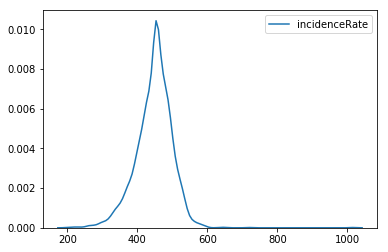

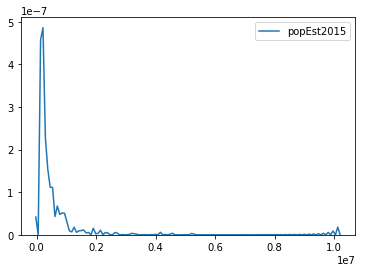

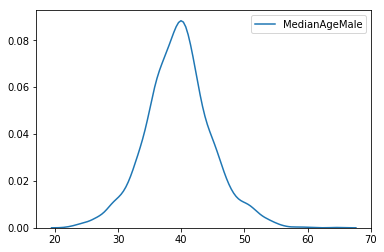

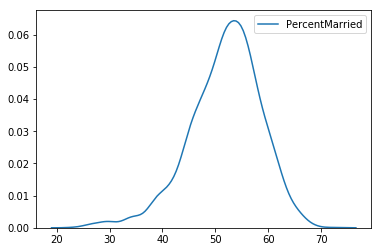

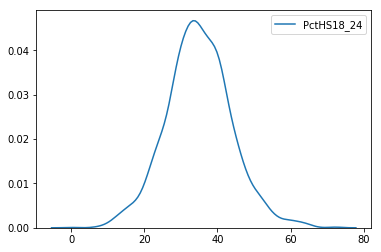

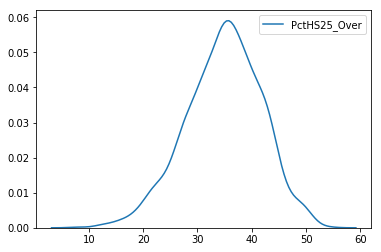

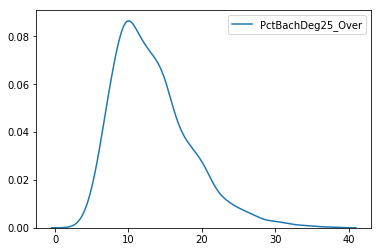

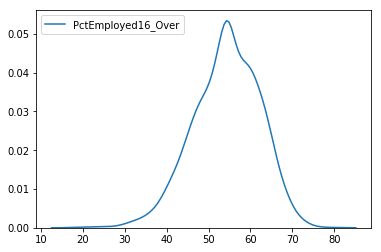

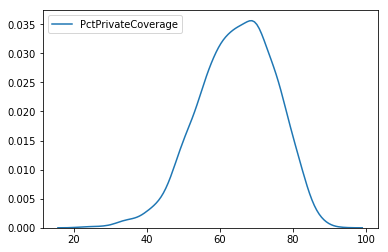

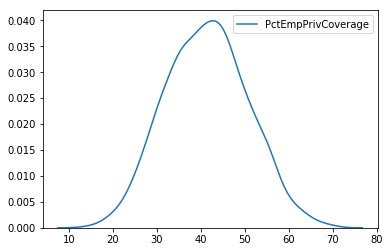

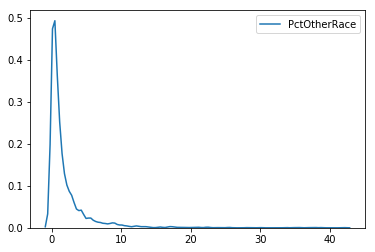

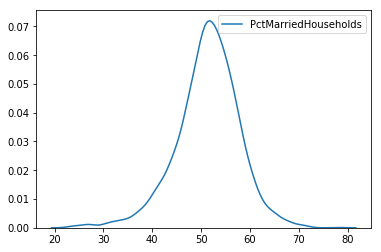

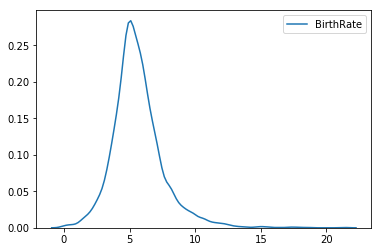

In [28]:
for i in X.columns:
        plt.figure()
        sns.kdeplot(X[i])

# feature which are not normally distributed

In [29]:
nor=[]
for i in  X.columns:
    if st.shapiro(X[i])[1]<0.05:
        nor.append(i)
    else:
        continue
print(nor)

['avgAnnCount', 'avgDeathsPerYear', 'incidenceRate', 'popEst2015', 'MedianAgeMale', 'PercentMarried', 'PctHS18_24', 'PctHS25_Over', 'PctBachDeg25_Over', 'PctEmployed16_Over', 'PctPrivateCoverage', 'PctEmpPrivCoverage', 'PctOtherRace', 'PctMarriedHouseholds', 'BirthRate']


In [30]:
to_t=X[['avgAnnCount', 'avgDeathsPerYear', 'incidenceRate', 'popEst2015', 'MedianAgeMale', 'PercentMarried', 'PctHS18_24', 'PctHS25_Over', 'PctBachDeg25_Over', 'PctEmployed16_Over', 'PctPrivateCoverage', 'PctEmpPrivCoverage', 'PctOtherRace', 'PctMarriedHouseholds', 'BirthRate']]

# segregating the right/left skewed features

In [31]:
right=[]
left=[]
for i in  to_t.columns:
    if st.skew(to_t[i])>0.5:
        right.append(i)
    elif st.skew(to_t[i])<-0.5:
            left.append(i)
    else:
        continue
print('right skwed :\n ', right,'\n\nleft skwed :\n ',left)

right skwed :
  ['avgAnnCount', 'avgDeathsPerYear', 'popEst2015', 'PctBachDeg25_Over', 'PctOtherRace', 'BirthRate'] 

left skwed :
  ['PercentMarried', 'PctMarriedHouseholds']


# transformation

In [32]:
to_t['avgDeathsPerYear']=np.log((to_t['avgDeathsPerYear']))
to_t['avgAnnCount']=np.log((to_t['avgAnnCount']))
to_t['popEst2015']=np.log((to_t['popEst2015']))
to_t['PctBachDeg25_Over']=np.log((to_t['PctBachDeg25_Over']))
to_t['PctOtherRace']=(np.log((to_t['PctOtherRace'])+1))
to_t['BirthRate']=np.sqrt((to_t['BirthRate']))
to_t['PercentMarried']=((to_t['PercentMarried'])**2)
to_t['PctMarriedHouseholds']=((to_t['PctMarriedHouseholds'])**2)

# skewness after transformation

In [33]:
for i in to_t:
    a=st.skew(to_t[i])
    print(i,':  ',a)

avgAnnCount :   0.33480112525630185
avgDeathsPerYear :   0.41544063495841105
incidenceRate :   -0.0656492637185816
popEst2015 :   0.5023113369420232
MedianAgeMale :   0.14108181837354597
PercentMarried :   -0.15927316028813485
PctHS18_24 :   0.175607975324238
PctHS25_Over :   -0.30819745919432034
PctBachDeg25_Over :   -0.04638513379945553
PctEmployed16_Over :   -0.38312214728092325
PctPrivateCoverage :   -0.38097253521641244
PctEmpPrivCoverage :   0.08284073271539542
PctOtherRace :   1.2103849245236493
PctMarriedHouseholds :   0.09417968044104384
BirthRate :   0.006710459376733097


# ditribution of after transformation

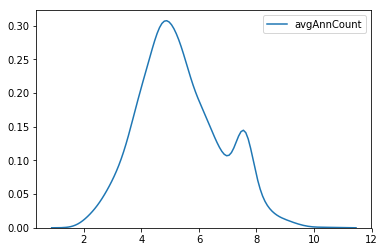

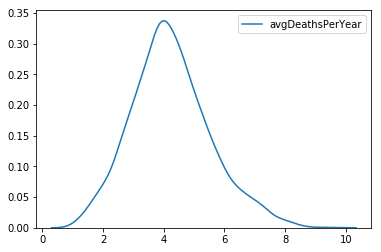

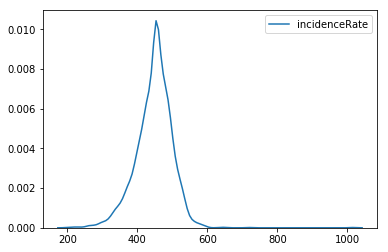

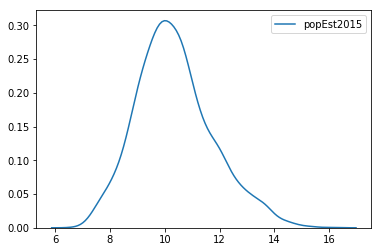

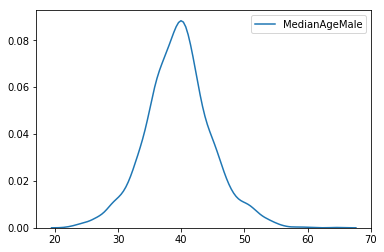

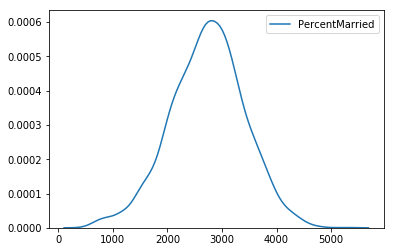

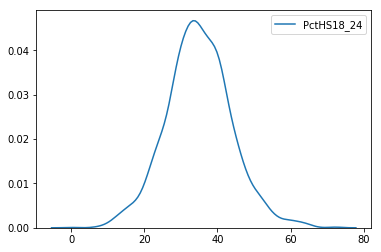

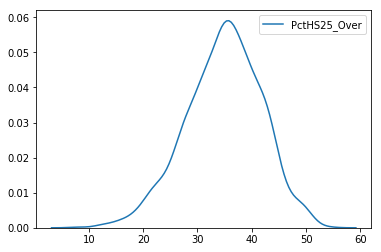

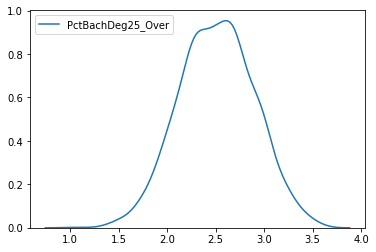

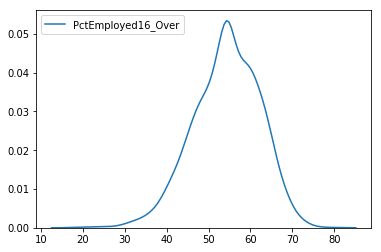

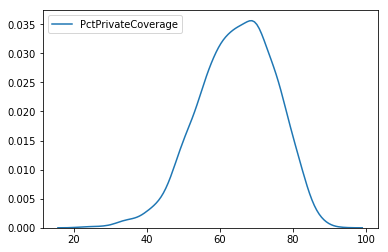

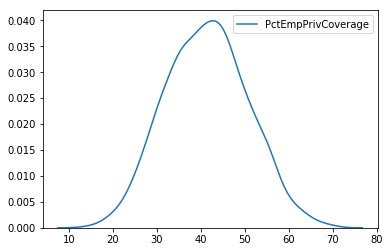

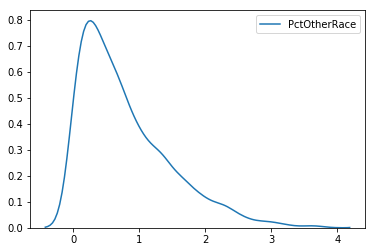

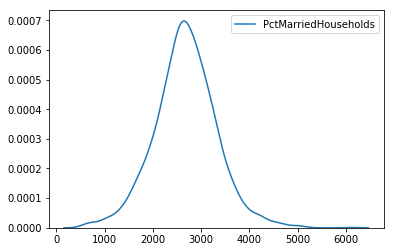

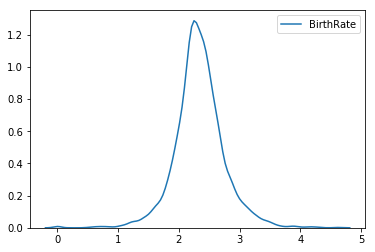

In [34]:
for i in to_t.columns:
        plt.figure()
        sns.kdeplot(to_t[i])

obsevation:

All the above graph shows the reduction in the skwness and look mostly normal distributed expect PctOtherRace.

# model building

In [35]:
# data split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(to_t,y1, test_size = 0.30, random_state = 20)

In [36]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [37]:
# r2 for the train data
print('r2 score for train data :',lin_reg.score(X_train, y_train))

r2 score for train data : 0.7013245164647527


In [38]:
# r2 for the test data
print('r2 score for train data :',lin_reg.score(X_test, y_test))

r2 score for train data : 0.6647129141022408


In [39]:
#  y predict for test data
y_predict=lin_reg.predict(X_test)

In [40]:
#rmse score
from sklearn.metrics import mean_squared_error as ms
print('rmse score :',np.sqrt(ms(y_predict,y_test)))

rmse score : 14.291982621240079


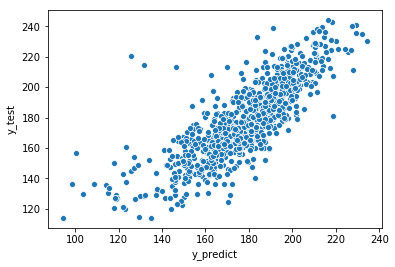

In [41]:
sns.scatterplot(y_predict,y_test)
plt.xlabel('y_predict')
plt.ylabel('y_test')
plt.show()

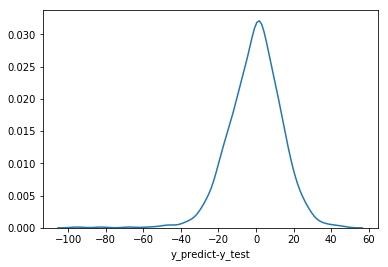

In [42]:
#distribution of 'y_predict-y_test'
a=y_predict-y_test
sns.kdeplot(np.array(a))
plt.xlabel('y_predict-y_test')
plt.show()

# implementation of quadratic equation

In [43]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 2) 
X_poly = poly.fit_transform(to_t) 
  
X_train, X_test , y_train, y_test = train_test_split(X_poly,y1, test_size = 0.30, random_state = 207)

In [44]:
lin2 = LinearRegression() 
lin2.fit(X_train,y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [45]:
#r2 for the train data
print('r2 score for train data :',lin2.score(X_train, y_train))

r2 score for train data : 0.9093303684296955


In [46]:
#r2 for the test data
print('r2 score for test data :',lin2.score(X_test, y_test))

r2 score for test data : 0.861766740402941


In [47]:
# predict y
y_predict=lin2.predict(X_test)

In [48]:
#  rmse score
print('rmse score :',np.sqrt(ms(y_predict,y_test)))

rmse score : 9.330863041282377


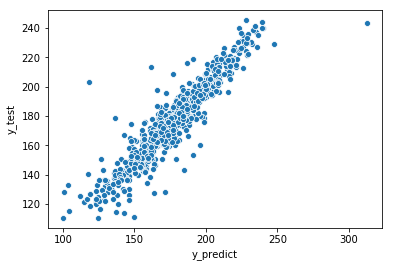

In [49]:
sns.scatterplot(y_predict,y_test)
plt.xlabel('y_predict')
plt.ylabel('y_test')
plt.show()

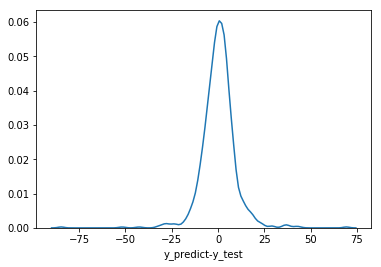

In [50]:
a=y_predict-y_test
sns.kdeplot(np.array(a))
plt.xlabel('y_predict-y_test')
plt.show()

## cross validation score

In [51]:
from sklearn.model_selection import cross_val_score
scores1 = cross_val_score(lin2,X=X_train,y=y_train, cv=10)
print ('Cross-validated scores:', scores1)

Cross-validated scores: [0.87960377 0.88105188 0.86932722 0.88165427 0.84732779 0.92086978
 0.85351801 0.77835061 0.88586744 0.89756903]


In [52]:
print('score_mean',scores1.mean(),': score_std',scores1.std())

score_mean 0.8695139797857043 : score_std 0.03623968308604316


# conclusion

The r2 value for the model is shown to be 86% with std of 3.6%